In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_0.dbf
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_3.dbf
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_0.shx
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_2.dbf
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_1.dbf
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_0.shp
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_3.shx
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_2.shp
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_2.shx
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_1.shx
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_3.shp
/kaggle/input/chinamap/gadm36_CHN_shp/gadm36_CHN_1.shp
/kaggle/input/gdp2020/GDP2020.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/in

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from tqdm.notebook import tqdm
tqdm().pandas()
import swifter

## Read all CSV 

In [6]:
time_series_covid_19_confirmed = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
time_series_covid_19_recovered = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
covid_19_data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')
time_series_covid_19_deaths = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
COVID19_line_list_data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
COVID19_open_line_list = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv')

In [7]:
time_series_covid_19_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [8]:
time_series_covid_19_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,31,33,34,34,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,43,46,76,76,76,101,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,78,96,96,97,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,22,23,24,24,24,26,26,26,35


In [9]:
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [10]:
time_series_covid_19_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
COVID19_line_list_data.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
COVID19_open_line_list.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring TimeSeries DataSet
1. time_series_covid_19_confirmed
2. time_series_covid_19_recovered

### Total Length each Dataframe

* 分別檢查兩份資料個數
* 兩者皆為 `442` 筆，其中可能包含 `nan` 的 row

In [13]:
total_size_of_recovered = len(time_series_covid_19_recovered)
total_size_of_confirmed = len(time_series_covid_19_confirmed)
print('recovered size = {:_}\nconfirmed size = {:_}'.format(total_size_of_recovered, total_size_of_confirmed))

recovered size = 442
confirmed size = 442


### Filter `Nan`

只有 `Province/State` 有 `nan` ，仍然能確定是屬於何種國家。

In [14]:
time_series_covid_19_recovered.isnull().sum().sort_values(ascending = False).head()

Province/State    135
2/14/20             0
2/12/20             0
2/11/20             0
2/10/20             0
dtype: int64

In [15]:
time_series_covid_19_confirmed.isnull().sum().sort_values(ascending = False).head()

Province/State    135
2/14/20             0
2/12/20             0
2/11/20             0
2/10/20             0
dtype: int64

### Peek unique discrete features except periods

In [16]:
time_series_covid_19_recovered.nunique()[:4]

Province/State    305
Country/Region    143
Lat               434
Long              420
dtype: int64

* `Province/State` : 總共包含 `305` 個不同的城市
* `Country/Region` : 總共包含 `143` 個不同的國家
* `Lat & Long` : 包含不同的經緯度。在這裡意義不大，之後會深入探討分布的位置情形。

### Recovered & Confirmed Distribution For each Country

* 分析武漢肺炎在各個國家的分布情形
* 將發現/確診(recoverd/confirmed)比例低於 1% 的國家列為 `Others`
* 從結果不難發現，美國占了最大的比例，其次為 `Others` ，第三為中國

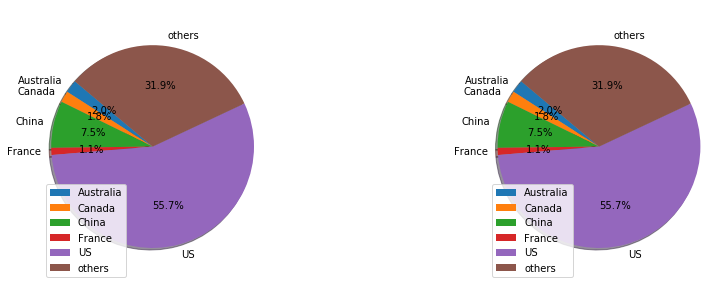

In [17]:
country_recovered = time_series_covid_19_recovered['Country/Region'].value_counts()
country_confirmed = time_series_covid_19_confirmed['Country/Region'].value_counts()

def thresholdAggre(df, percent=0.01):
    threshhold = df.sum(axis=0, skipna=True)  * percent
    df.rename(index=lambda s: 'others' if df[s] < threshhold else s, inplace=True)
    return df.groupby(df.index).agg(sum)


country_recovered = thresholdAggre(country_recovered)
country_confirmed = thresholdAggre(country_confirmed)

fig = plt.figure(figsize=(12,5))

plt.subplot(121)
plt.pie(country_recovered, autopct='%1.1f%%', shadow=True, startangle=140, labels=country_recovered.index)
plt.axis('equal')
plt.legend()

plt.subplot(122)
plt.pie(country_confirmed, autopct='%1.1f%%', shadow=True, startangle=140, labels=country_confirmed.index)
plt.axis('equal')
plt.legend()

plt.subplots_adjust(wspace=1)
plt.show()

**Note** : 注意到這裡的統計數據是基於**有發生的地區**而非**有發生地區的人數**。也就是說，從上圖我們可以得知`US`占了最大的比例，
    但不見得有最多的患者，只能說明COVID19在這個地區分布的很廣。因此，為了探討病例的數量，我們必須將時間序列的資料列入計算。

In [18]:
time_series_covid_19_recovered['total_nums'] = time_series_covid_19_recovered['3/14/20']
time_series_covid_19_confirmed['total_nums'] = time_series_covid_19_confirmed['3/14/20']

In [19]:
country_people_recovered = time_series_covid_19_recovered.groupby('Country/Region')['total_nums'].sum()
country_people_confirmed = time_series_covid_19_confirmed.groupby('Country/Region')['total_nums'].sum()

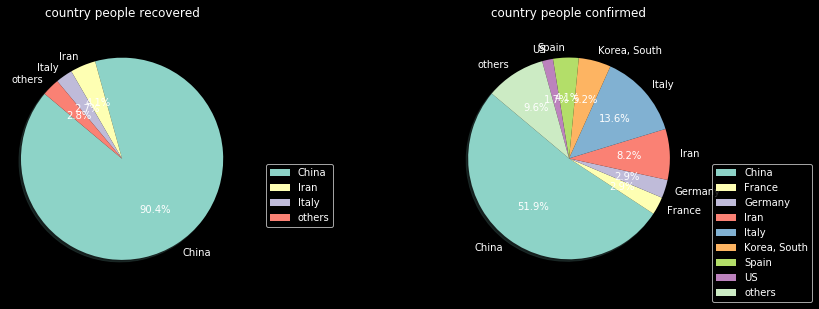

In [20]:
country_people_recovered = thresholdAggre(country_people_recovered)
country_people_confirmed = thresholdAggre(country_people_confirmed)

with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(12,5))

    plt.subplot(121)
    plt.pie(country_people_recovered, autopct='%1.1f%%', shadow=True, startangle=140, labels=country_people_recovered.index)
    plt.axis('equal')
    plt.title('country people recovered')
    plt.legend(bbox_to_anchor=(1.12, 0.5))


    plt.subplot(122)
    plt.pie(country_people_confirmed, autopct='%1.1f%%', shadow=True, startangle=140, labels=country_people_confirmed.index)
    plt.axis('equal')
    plt.title('country people confirmed')
    plt.legend(bbox_to_anchor=(1.12, 0.5))

    plt.subplots_adjust(wspace=1)
    plt.show()

江將！當初比例最高的 `US` 低於母體數 `1%` 被歸類為 `Others`。而且可以發現 `recoverd` 和 `confirmed` 的分佈有很明顯的不同。

### Correaltion
從經緯度資料與總發現病例來做關聯分析，這裡使用correlation matrix來呈現

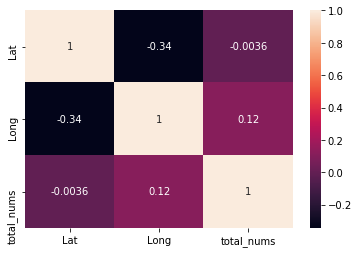

In [21]:
with plt.style.context('seaborn-dark-palette'):
    sns.heatmap(time_series_covid_19_recovered[['Lat','Long', 'total_nums']].corr(), annot=True)

In [22]:
start = time_series_covid_19_recovered.columns.get_loc('1/22/20')
end = time_series_covid_19_recovered.columns.get_loc('3/14/20')
timeseries_by_country = time_series_covid_19_recovered.groupby('Country/Region')
timeseries_by_country = timeseries_by_country[list(time_series_covid_19_recovered)[start:end]].sum()

我們檢查一下數據的正確性，看看是否與之前的圖表不相符。我們使用 `sort_values` 來看 top 5 的結果。

In [23]:
timeseries_by_country.sort_values(by=['3/13/20'],ascending=False).head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,28,30,36,39,49,58,101,120,135,214,...,50001,52292,53944,55539,57388,58804,60181,61644,62901,64196
Iran,0,0,0,0,0,0,0,0,0,0,...,552,739,913,1669,2134,2394,2731,2959,2959,2959
Italy,0,0,0,0,0,0,0,0,0,0,...,276,414,523,589,622,724,724,1045,1045,1439
"Korea, South",0,0,0,0,0,0,0,0,0,0,...,41,41,135,135,118,118,247,288,333,510
Cruise Ship,0,0,0,0,0,0,0,0,0,0,...,10,10,40,40,40,40,40,325,325,325


In [24]:
avg = timeseries_by_country.mean(axis=1)
std = timeseries_by_country.std(axis=1)
timeseries_by_country_norm_1 = (timeseries_by_country - avg) / std

In [25]:
timeseries_by_country_norm_1 = timeseries_by_country.apply(lambda x: x/x.max(axis=0), axis=1).fillna(0)

In [26]:
timeseries_by_country_norm_1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


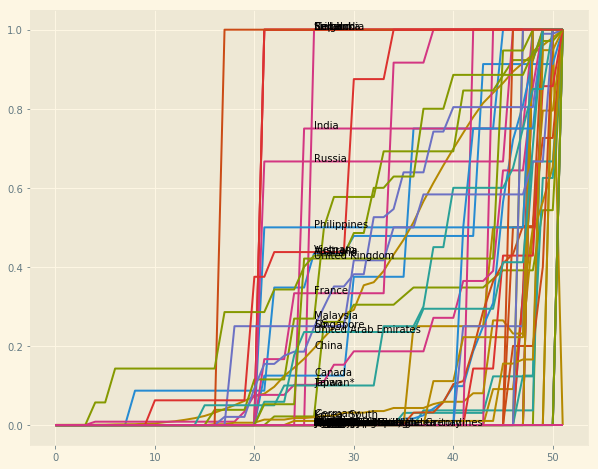

In [27]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(figsize=(10, 8))

    for i, (_,row) in enumerate(timeseries_by_country_norm_1.iterrows()):
        ax.plot(range(len(row)), row, label=timeseries_by_country_norm_1.index[i])
        ax.text(len(row)/2, row[len(row)//2], timeseries_by_country_norm_1.index[i], color='black')

    plt.show()

### Using Basemap to see the variation along date

In [28]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [29]:
lat = time_series_covid_19_recovered['Lat'].values
lon = time_series_covid_19_recovered['Long'].values
population = time_series_covid_19_recovered['total_nums'].values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


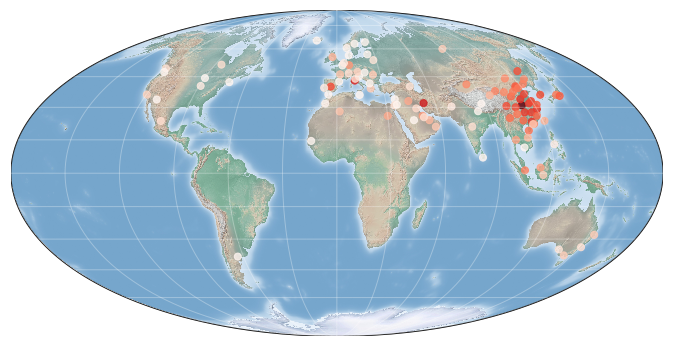

In [30]:
fig = plt.figure(figsize=(20, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)

m.scatter(lon, lat, latlon=True,
          c=np.log(population), s=50,
          cmap='Reds', alpha=0.8)

draw_map(m)

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


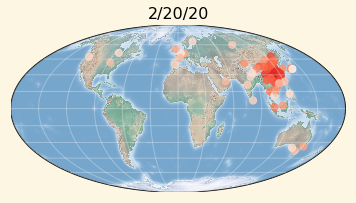

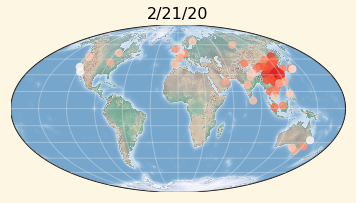

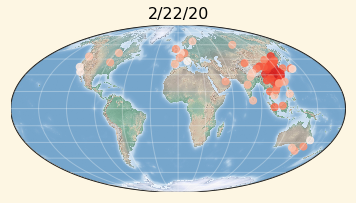

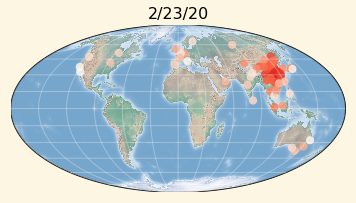

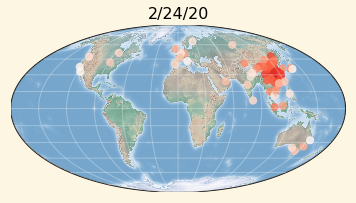

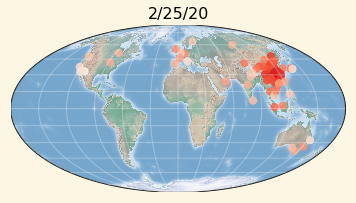

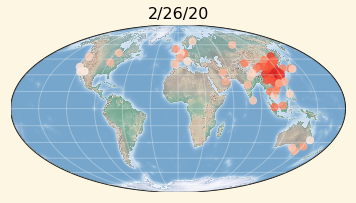

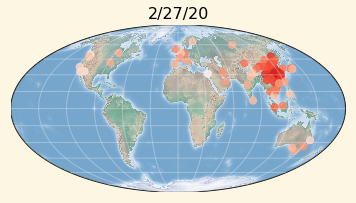

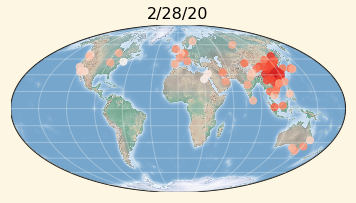

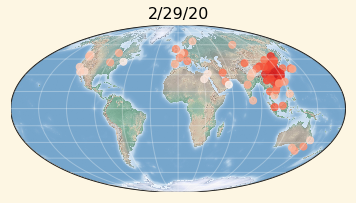

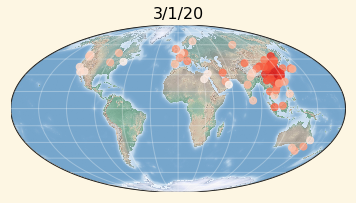

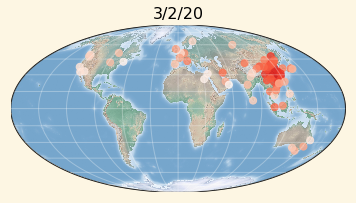

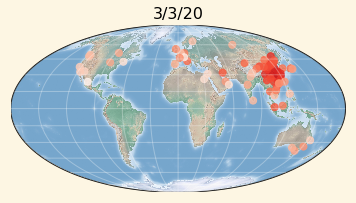

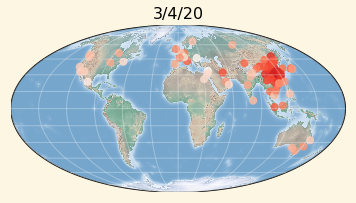

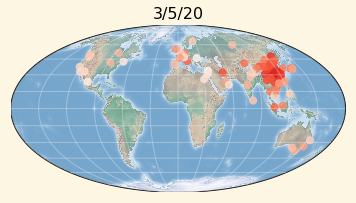

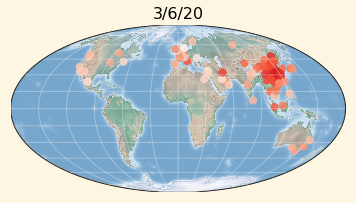

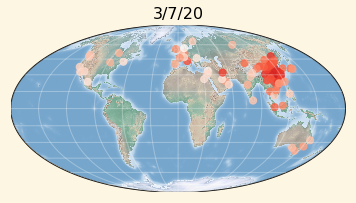

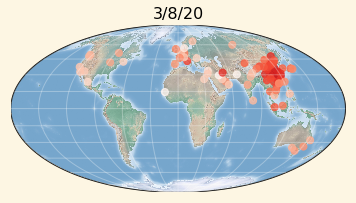

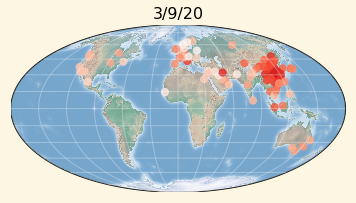

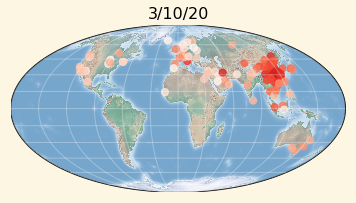

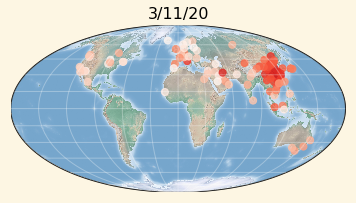

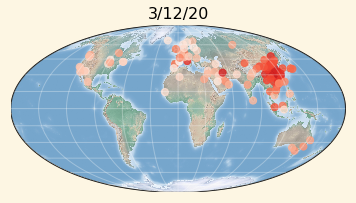

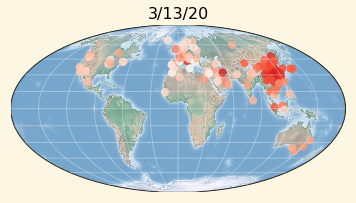

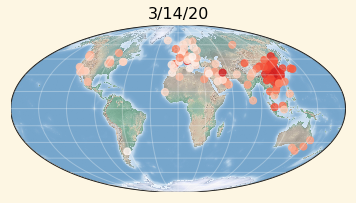

In [31]:
time_series = time_series_covid_19_recovered[list(time_series_covid_19_recovered)[4:-1]]
time_series = time_series.cumsum(axis=1)
x = time_series.rolling(30, axis=1).max().dropna(axis=1, how='all')
with plt.style.context('Solarize_Light2'):
    for i in range(len(x.columns)):
        m.scatter(lon, lat, latlon=True, c=np.log10(x[x.columns[i]]), s=50, cmap='Reds', alpha=0.8)
        plt.title(x.columns[i])
        draw_map(m)
        plt.show()


從 `2020.2.20 - 2020.3.14` 的區間中，我們對比較顯著的變化來做case by case的討論:
1. 美國西岸病例數量持續增加，大約從3月開始，數量已經超越美國東岸
2. 歐洲也是從沿岸往內陸感染
3. 澳洲東南岸有疫情
4. 中東地區與中國接壤處疫情逐漸嚴重
5. 中國幾乎全境感染

不難發現在沿岸地區普遍發生病例，而且集中於人口密集地區。

### Population & GDP extra-data with Country all over the world
* World Population Review
    * url: https://worldpopulationreview.com/countries/countries-by-density/
* World GDP Review
    * url: https://worldpopulationreview.com/countries/countries-by-gdp/

In [32]:
population2020 = pd.read_csv("/kaggle/input/population2020/population2020.csv")
GDP2020 = pd.read_csv("/kaggle/input/gdp2020/GDP2020.csv")

In [33]:
population2020.head()

,rank,name,density,densityMi,pop2020,area
0,1,Macau,21644.5000,56059.2550,649.335,30.00
1,2,Monaco,19426.7327,50315.2376,39.242,2.02
2,3,Singapore,8239.9183,21341.3884,5850.342,710.00
3,4,Hong Kong,6790.7437,17588.0261,7496.981,1104.00
4,5,Gibraltar,5615.1667,14543.2817,33.691,6.00


In [34]:
GDP2020.head()

,rank,country,imfGDP,unGDP,gdpPerCapita,pop
0,1,United States,2.219812e+13,18624475000000,67063.2695,331002.651
1,2,China,1.546810e+13,11218281029298,10746.7828,1439323.776
2,3,Japan,5.495420e+12,4936211827875,43450.1405,126476.461
3,4,Germany,4.157120e+12,3477796274497,49617.1450,83783.942
4,5,India,3.257720e+12,2259642382872,2360.6592,1380004.385


In [35]:
len(population2020['name']), len(GDP2020['country'])

(232, 211)

前面有統計過不同國家的數量 `Country/Region` 為 `143` 個。
然而，2020人口的dataset包含了 `232` 個國家，看起來是足夠的，但我們還是得檢查是否涵蓋了全部的國家。

In [36]:
set(time_series_covid_19_recovered['Country/Region']) - set(population2020['name'])

{'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Cruise Ship',
 'Czechia',
 'Eswatini',
 'Guernsey',
 'Holy See',
 'Jersey',
 'Korea, South',
 'North Macedonia',
 'Taiwan*',
 'US',
 'occupied Palestinian territory'}

有 `13` 個國家沒有包含到，可能是名字不同，例如 `US` 等同於 `United States`，我們必須找到與之對應的名字。像是島嶼國家例如: `Guernsey` `Jersey` 從人口分布資料中未能找到，因此將他並為所屬的 `United Kingdom`。
有趣的是，其中包含了一些屬於 `Cruise Ship` 的移動式國家lol

In [37]:
set(time_series_covid_19_recovered['Country/Region']) - set(GDP2020['country'])

{'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Cruise Ship',
 'Czechia',
 'Eswatini',
 'French Guiana',
 'Guadeloupe',
 'Guernsey',
 'Holy See',
 'Jersey',
 'Korea, South',
 'Martinique',
 'North Macedonia',
 'Reunion',
 'Taiwan*',
 'US',
 'occupied Palestinian territory'}

In [38]:
map_state = {'US':'United States', 
             'Korea, South':'South Korea',
             'Cote d\'Ivoire':'Ivory Coast',
             'Czechia':'Czech Republic',
             'Eswatini':'Swaziland',
             'Guernsey':'United Kingdom',
             'Holy See':'Vatican City',
             'Jersey':'United Kingdom',
             'North Macedonia':'Macedonia',
             'Taiwan*':'Taiwan',
             'occupied Palestinian territory':'Palestine'
            }
map_state_rev = {v: k for k, v in map_state.items()}

In [39]:
population2020.rename(columns={'name':'Country/Region'},inplace=True)
population2020['Country/Region'] = population2020['Country/Region'].swifter.apply(lambda x: map_state_rev[x] if x in map_state_rev else x)

In [40]:
GDP2020.rename(columns={'country':'Country/Region'},inplace=True)
GDP2020['Country/Region'] = GDP2020['Country/Region'].swifter.apply(lambda x: map_state_rev[x] if x in map_state_rev else x)

In [41]:
time_series_covid_19_recovered = time_series_covid_19_recovered.merge(population2020, how='left', on='Country/Region')
time_series_covid_19_recovered = time_series_covid_19_recovered.merge(GDP2020, how='left', on='Country/Region').drop(['pop'],axis=1)

In [42]:
time_series_covid_19_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,total_nums,rank_x,density,densityMi,pop2020,area,rank_y,imfGDP,unGDP,gdpPerCapita
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,86.0,136.0305,352.3190,69799.978,513120.0,25.0,5.474310e+11,4.070263e+11,7842.8535
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,36.0,334.6558,866.7585,126476.461,377930.0,3.0,5.495420e+12,4.936212e+12,43450.1405
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,3.0,8239.9183,21341.3884,5850.342,710.0,36.0,3.918750e+11,2.969463e+11,66983.2635
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,72.0,197.9658,512.7315,29136.808,147181.0,101.0,3.303500e+10,2.091400e+10,1133.7893
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,114.0,97.8407,253.4074,32365.999,330803.0,35.0,4.019850e+11,2.965315e+11,12419.9781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,46.0,298.0958,772.0681,183.627,616.0,169.0,2.069000e+09,1.397067e+09,11267.4062
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,48.0,285.1928,738.6494,110.940,389.0,180.0,9.030000e+08,7.653187e+08,8139.5349
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,224.0,3.5810,9.2747,586.632,163820.0,157.0,3.919000e+09,3.278445e+09,6680.5084
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,174.0,35.3160,91.4683,331002.651,9372610.0,1.0,2.219812e+13,1.862448e+13,67063.2695


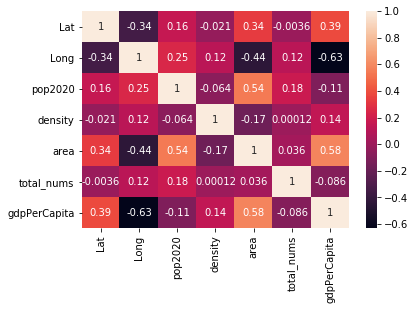

In [43]:
sns.heatmap(time_series_covid_19_recovered[['Lat','Long','pop2020','density','area','total_nums','gdpPerCapita']].corr(), annot=True)

### Map corresponds to Population

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


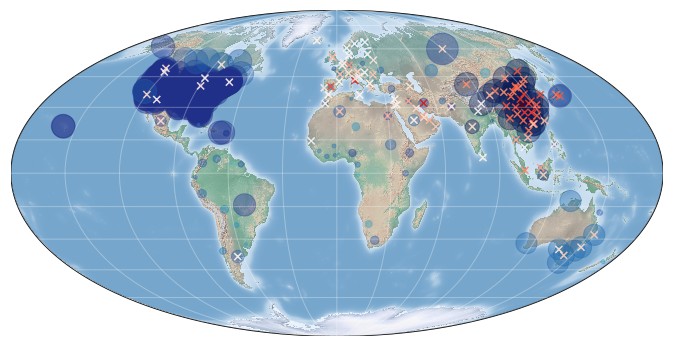

In [44]:
total_population = time_series_covid_19_recovered.fillna(0)['pop2020'].values
area = time_series_covid_19_recovered.fillna(0)['area'].values

fig = plt.figure(figsize=(20, 6), edgecolor='w')

m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)

m.scatter(lon, lat, latlon=True,
          c=np.log(total_population), s=area/max(area) * 1000,
          cmap='YlGnBu', alpha=0.4)

m.scatter(lon, lat, latlon=True,
          c=np.log(population), s=50,
          cmap='Reds', alpha=0.9, marker='x')
draw_map(m)

### Map corresponds to GDP

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


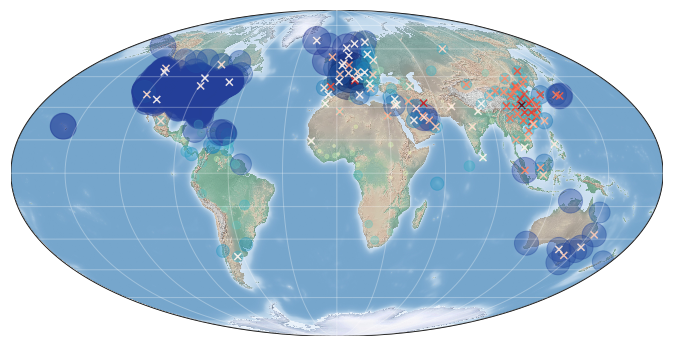

In [45]:
gdpPerCapita = time_series_covid_19_recovered.fillna(0)['gdpPerCapita'].values
area = time_series_covid_19_recovered.fillna(0)['area'].values

fig = plt.figure(figsize=(20, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)

m.scatter(lon, lat, latlon=True,
          c=np.log(gdpPerCapita), s=gdpPerCapita/100,
          cmap='YlGnBu', alpha=0.4)

m.scatter(lon, lat, latlon=True,
          c=np.log(population), s=50,
          cmap='Reds', alpha=0.9, marker='x')
draw_map(m)

從結果上我們不能說人口密集程度與病例正相關，因為在中國和美國，兩個同樣是人口密度高的國家，但具有截然不同的病例數。但是我們可以說幾乎人口聚集的地方通常會有病例。

### Top 10 the Density of COVID19 over Country

In [46]:
time_series_covid_19_recovered['average_covid19_in_country'] = time_series_covid_19_recovered['total_nums'] / time_series_covid_19_recovered['area']

In [47]:
time_series_covid_19_recovered.sort_values('average_covid19_in_country',ascending=False)[['Country/Region','average_covid19_in_country']].head(10)

,Country/Region,average_covid19_in_country
2,Singapore,0.147887
43,San Marino,0.065574
27,Bahrain,0.057516
16,Italy,0.006524
156,China,0.005456
158,"Korea, South",0.005089
88,Malta,0.003165
61,Andorra,0.002137
157,Iran,0.001795
18,Spain,0.001022


天哪！新加玻平均土地發現的病例人數遠高於其他國家，但實際上並不是病例最多的國家，可能是因為國土的限制造成每單位土地面積病例數過高。

In [48]:
start = time_series_covid_19_recovered.columns.get_loc('1/22/20')
end = time_series_covid_19_recovered.columns.get_loc('3/14/20')
timeseries = time_series_covid_19_recovered[list(time_series_covid_19_recovered)[start:end]]
time_series_covid_19_recovered['first_burst'] = timeseries[timeseries!=0].idxmin(axis=1)
time_series_covid_19_recovered_drop_nan = time_series_covid_19_recovered.dropna(subset=['first_burst'])

### First and Last Occurence in each country

In [49]:
time_series_covid_19_recovered_drop_nan.sort_values(by='first_burst')[['Country/Region', 'Province/State' ,'first_burst']].head(15)

,Country/Region,Province/State,first_burst
156,China,Hubei,1/22/20
160,China,Guangdong,1/23/20
162,China,Zhejiang,1/24/20
173,China,Beijing,1/24/20
174,China,Shanghai,1/24/20
168,China,Jiangsu,1/25/20
0,Thailand,NaN,1/26/20
1,Japan,NaN,1/26/20
165,China,Jiangxi,1/27/20
177,China,Guangxi,1/28/20


從結果來看，我們可以發現從既有的資料中，中國是最早發生病毒的。從資料中的 `2020.1.22 - 2020.3.14` 的期間內，最早發生是在 `2020.1.22` 直到 `2020.1.26` 才在中國以外的國境內看到。

In [50]:
time_series_covid_19_recovered_drop_nan.sort_values(by='first_burst')[['Country/Region', 'Province/State' ,'first_burst']].tail(15)

,Country/Region,Province/State,first_burst
30,Croatia,NaN,3/13/20
31,Switzerland,NaN,3/3/20
47,Mexico,NaN,3/3/20
23,Lebanon,NaN,3/4/20
40,Romania,NaN,3/4/20
27,Bahrain,NaN,3/6/20
172,Denmark,Denmark,3/6/20
66,Senegal,NaN,3/8/20
28,Kuwait,NaN,3/8/20
34,Pakistan,NaN,3/8/20


In [51]:
timeseries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,0,0,0,0,2,2,5,5,5,5,...,31,31,31,31,31,31,33,34,34,35
1,0,0,0,0,1,1,1,1,1,1,...,43,43,46,76,76,76,101,118,118,118
2,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,96,96,97
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,22,22,22,23,24,24,24,26,26,26
